Author: Ivan Bongiorni

Repository: 

# Study of scaling transformation

The scaling transformation I applied for this project follows to steps:

1. Apply `y = log( x + 1 )`.
2. Min-max scale the result between 0 and its 99th percentile.

Since language subgroups differ significantly in scale, I applied this transformation to each subgroup. A scaling dictionary with the 99th percentiles taken from each linguistic subgroup is saved to `/data_processed/` folder during the execution of processing pipeline.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn

# Local modules
import tools

In [2]:
# Load raw data
X = pd.read_csv('data_raw/train_2.csv') 
print(X.shape)
X.head() 

(145063, 804)


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [3]:
X['language'] = [ tools.process_url(url) for url in X['Page'].tolist() ] 

language = X['language'] 

In [4]:
# Drop URL string and convert to numpy array
X = X.drop(['Page', 'language'], axis = 1).values

## Visualization of trends - by language 

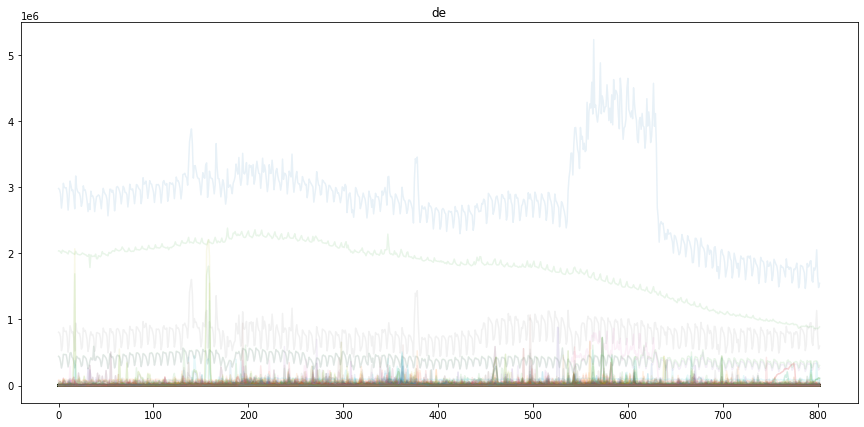

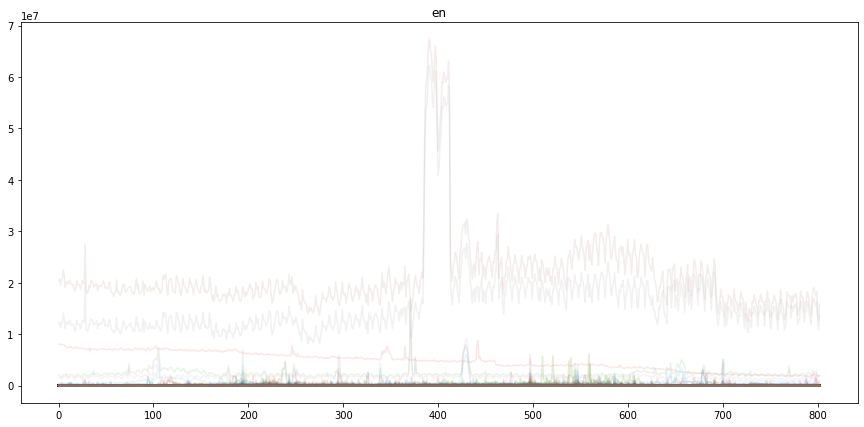

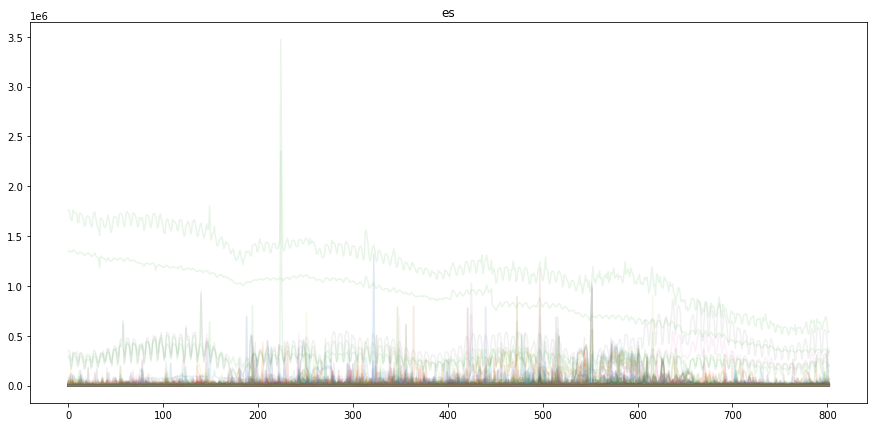

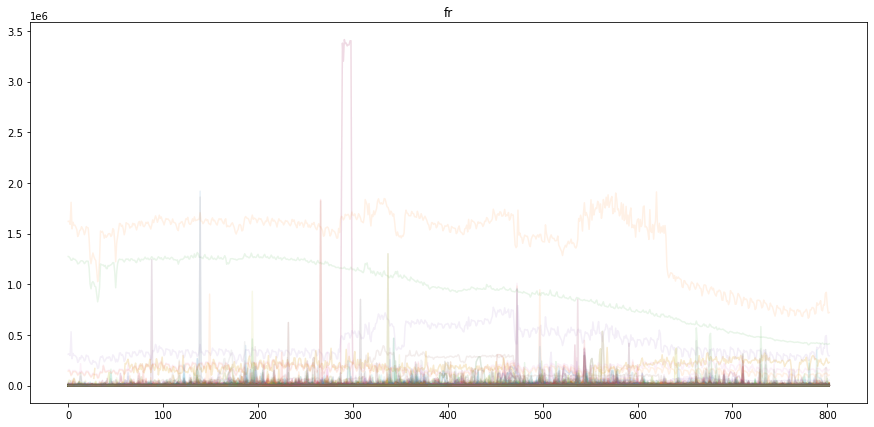

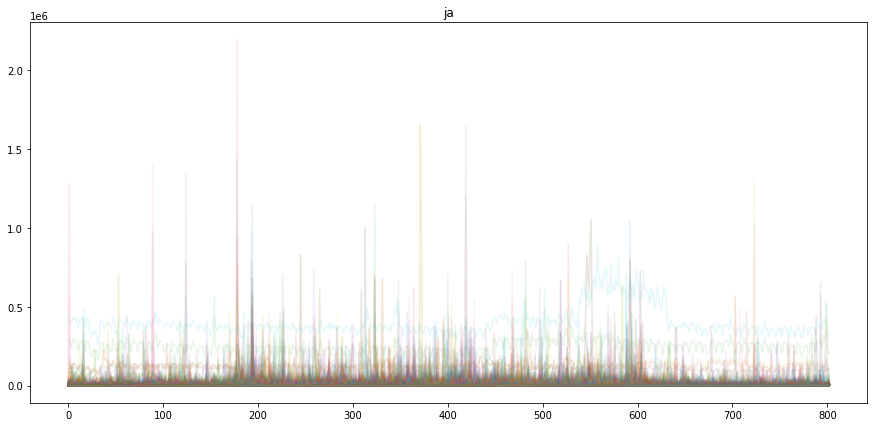

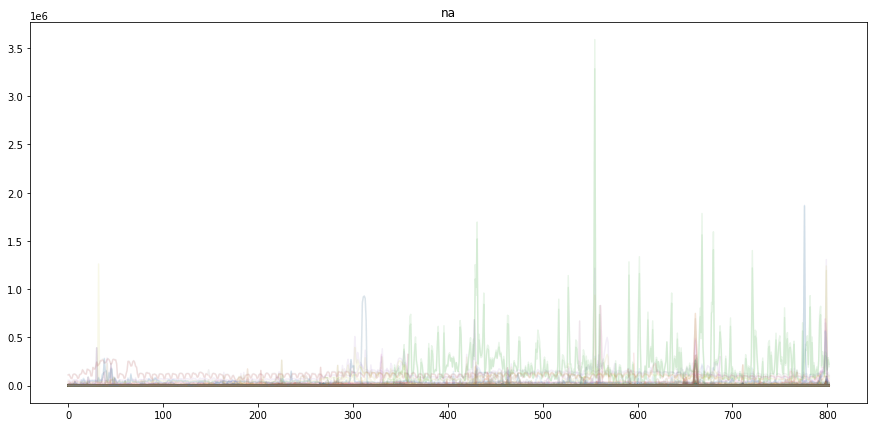

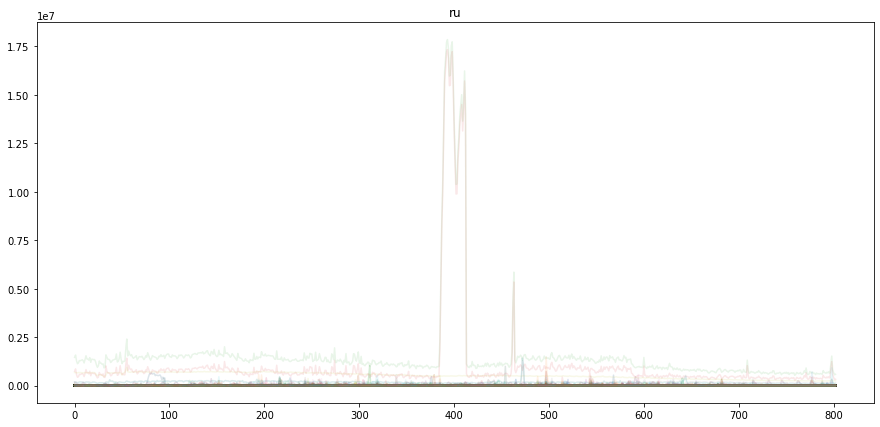

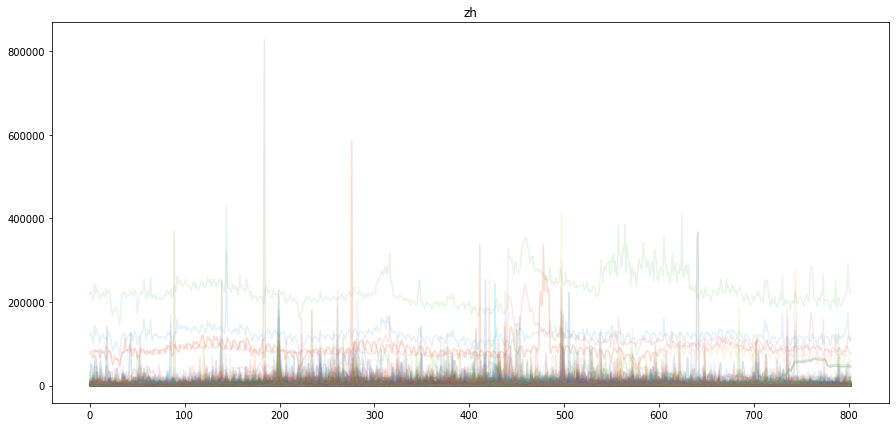

In [5]:
for lang in np.unique(language):
    subX = X[ language == lang , : ]
    
    plt.figure(figsize=(15,7))
    
    for i in range(subX.shape[0]):
        plt.plot(subX[i,:], alpha = 0.1)
    plt.title(lang)
    plt.show() 
    
del subX

## Effects of scaling

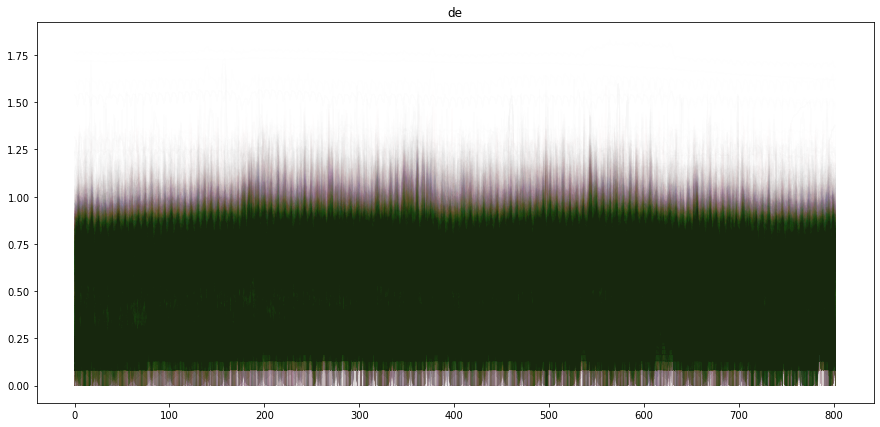

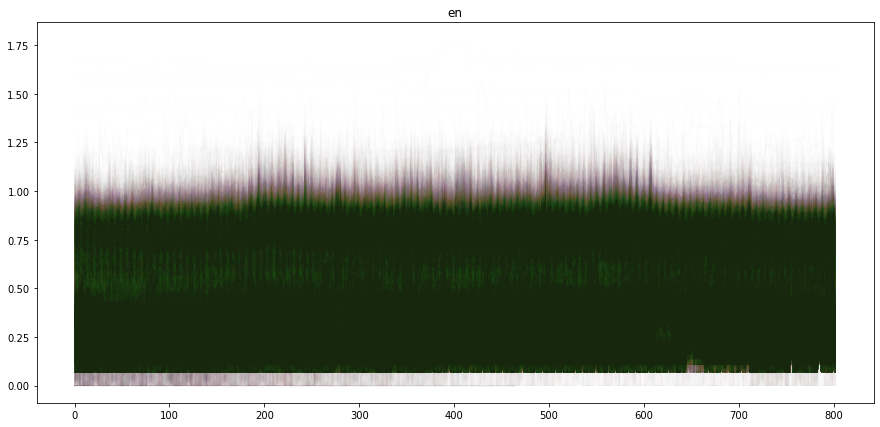

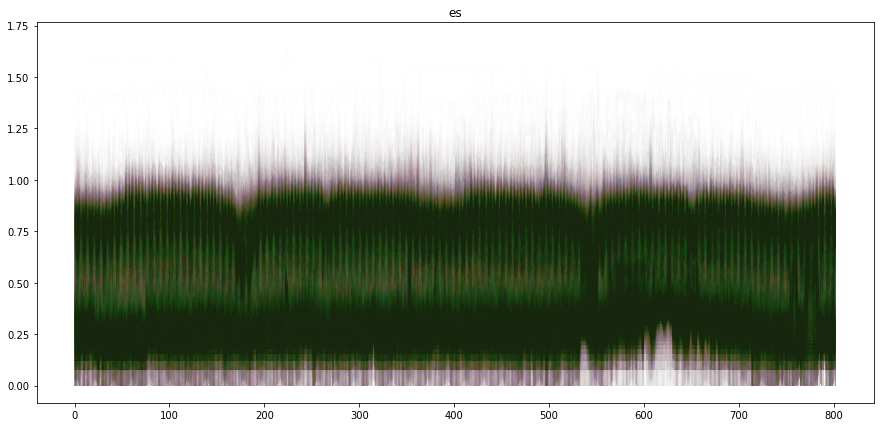

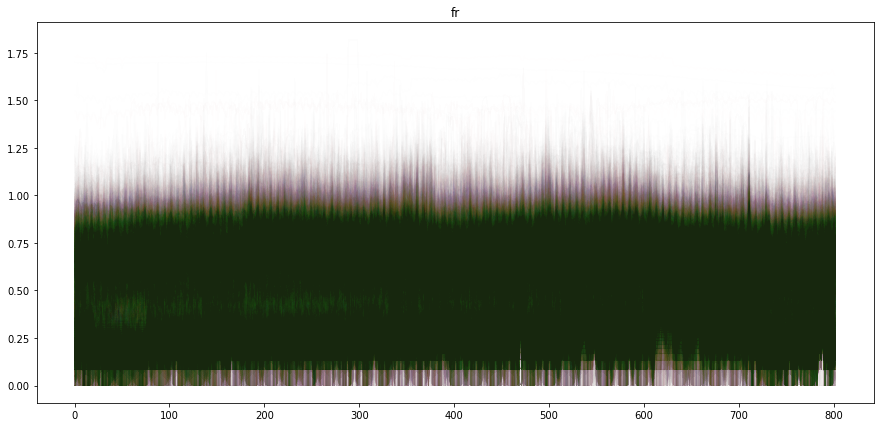

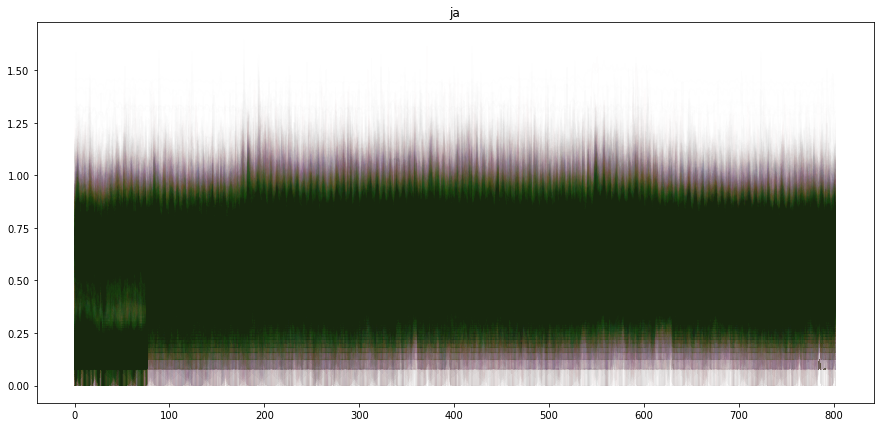

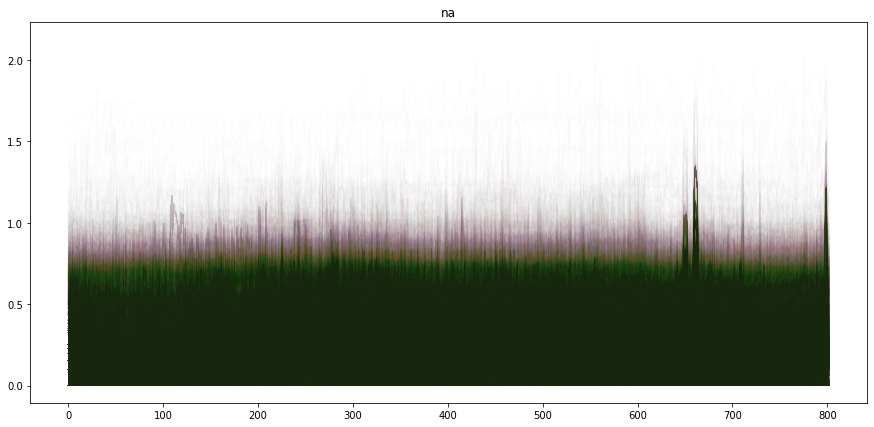

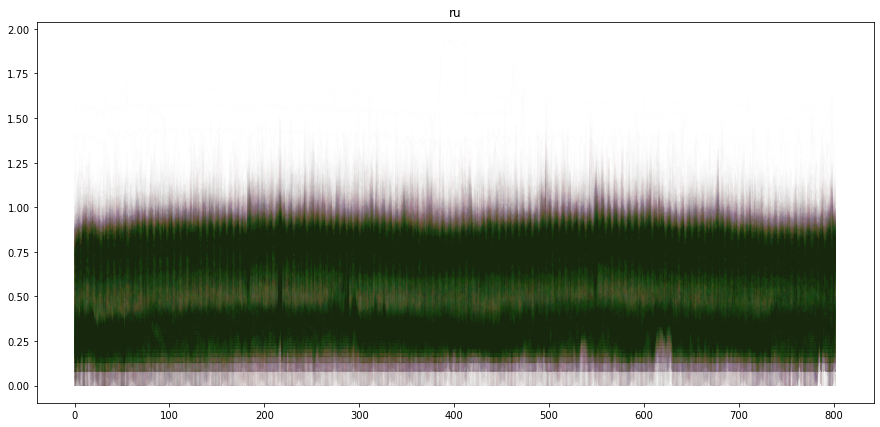

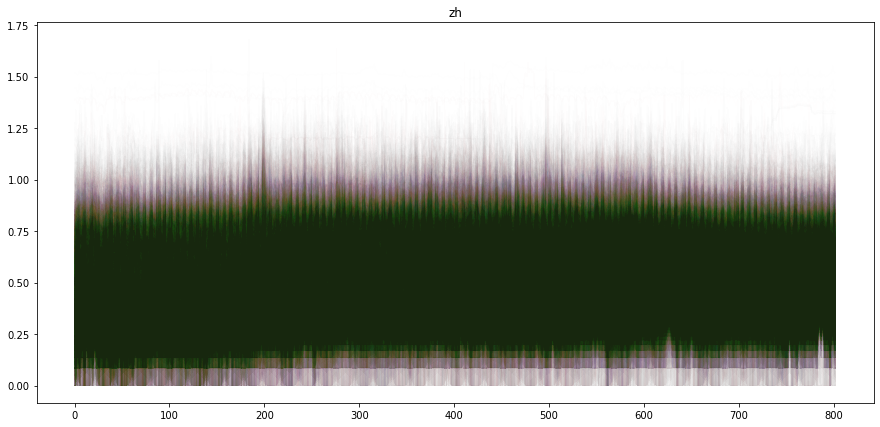

In [7]:
for lang in np.unique(language):
    subX = X[ language == lang , : ]
    
    # apply scaling
    percentile = np.nanpercentile(subX, 99)
    subX = tools.scale_trends(subX, percentile)
    
    plt.figure(figsize=(15,7))
    
    for i in range(subX.shape[0]):
        plt.plot(subX[i,:], alpha = 0.005)
    plt.title(lang)
    plt.show() 
    
del subX